# Taller (ejemplos-ejercicios) de Machine learning

En este taller se estudia la técnica de aprendizaje de máquina enfocada en problemas de regresión.

In [ ]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

### Regresión por mínimos cuadrados

En el curso se vio un ejemplo inicial de regresión por mínimos cuadrados en el que se ajustaba un modelo lineal (a una línea recta)  empleando el algoritmo de mínimos cuadrados. Este modelo es óptimo desde el punto de vista de álgebra lineal y a su vez es sencillo y permite ajustar modelos con buena precisión. basta con escoger la forma de una curva apropiada para que el modelo realice un ajuste con poco error.
Como ejemplo de esta situación, es común necesitar modelos regresión muy simples en sistemas con capacidad de cómputo limitado. Tal es el caso de micro-controladores que no tienen tanta potencia para correr modelos grandes, por lo que un modelo de mínimos cuadrados funciona muy bien en casos como la toma de mediciones.

En el ejercicio se obtendrá un modelo que permita explicar los datos de un sensor de temperatura de tipo NTC. Estos sensores han sido ampliamente estudiados y se conoce el modelo de Steinhart-Hart que tiene forma logarítmica y emplea solo tres coeficientes (a, b y c)
**Nota** el modelo de Steinhart-Hart debe emplearse en grados Kélvin

$$ \frac{1}{T} = a + b\times ln(R) + c \times ln^3(R) $$

A partir de los datos, queremos encontrar los parámetros, por medio de la pseudo inversa de Moore Penrose para resolver un problema de la forma $Ax = b$ en donde $A$ es una matriz, $b$ un vector con las mediciones y $x$ el vector con los coeficientes que queremos hallar

$$ A^{-1} = (A^T A)^{-1}\times A^T $$

la solución será

$$ \bar{x} = (A^T A)^{-1}\times A^T \times \bar{b} $$
Esta solución se puede programar directamente usando la multiplicación de matrices de Numpy. También se puede obtener A inversa directamente con la función `np.linalg.pinv()`. El resultado es el mismo

para el ejercicio solo se tienen tres mediciones con esto probaremos cómo se ajusta el modelo a pesar de tener pocos datos, no siempre los modelos más grandes y robustos son la mejor solución para todos los problemas

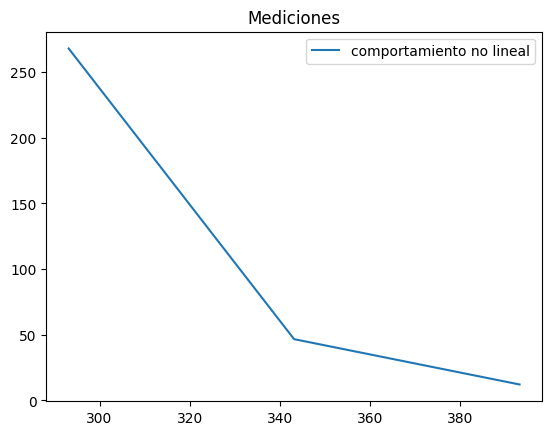

In [ ]:
temperaturas = np.array([20, 70, 120])
medicion_resistencias = ([268.044,46.631,12.114])
# graficando los datos
# preprocesamiento de los datos: convertir a grados Kelvin
temperaturas_kelvin = temperaturas + 273.15
plt.plot(temperaturas_kelvin, medicion_resistencias)
plt.title("Mediciones")
plt.legend(["comportamiento no lineal"])


Crearemos las matrices:


$$
\begin{equation}
A =
\begin{pmatrix}
1 & ln(R_0) & ln^3(R_0)\\
1 & ln(R_1) & ln^3(R_1)\\
1 & ln(R_2) & ln^3(R_2)\\
\end{pmatrix}
\end{equation}
$$


$$
\begin{equation}
b =
\begin{pmatrix}
1/T_0\\
1/T_1\\
1/T_2\\
\end{pmatrix}
\end{equation}
$$


$$
\begin{equation}
x =
\begin{pmatrix}
a\\
b\\
c\\
\end{pmatrix}
\end{equation}
$$

In [ ]:
# creando la matriz A
A = np.ones((len(temperaturas), 3))
# ajustando la segunda columna
A[:,1] = np.log(medicion_resistencias)
# ajustando la tercera columna de la matriz A.
A[:,2] = np.power(np.log(medicion_resistencias), 3)
# ahora el vector b
b = 1 / temperaturas_kelvin
# resolviendo el sistema (calcular la regresión, es decir, los mejores parámetros A, B, C que explican los datos
# dado el modelo descrito
x = np.dot(np.linalg.pinv(A), b)

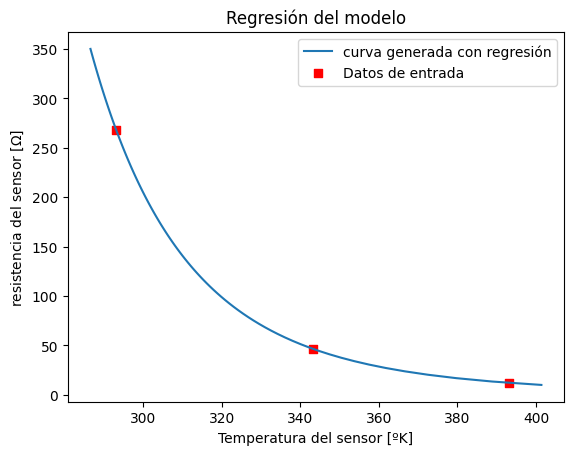

In [ ]:
# Ahora generando una curva con los datos
resistencias_generadas = np.linspace(10, 350, 100) # resistencias generadas
# aplicamos la función con los coeficientes
temp_inversas = x[0] + x[1] * np.log(resistencias_generadas) + x[2] * np.power(np.log(resistencias_generadas), 3)
temperaturas_modelo = 1/ temp_inversas

plt.plot(temperaturas_modelo, resistencias_generadas)
plt.scatter(temperaturas_kelvin, medicion_resistencias, c="r", marker="s")
plt.title("Regresión del modelo")
plt.xlabel("Temperatura del sensor [ºK]")
plt.ylabel("resistencia del sensor ["r"$\Omega$]")
plt.legend(["curva generada con regresión", "Datos de entrada"])

## Tarea(1) en clase/casa:

De acuerdo a lo anterior, consultar el método de regresión logaritmica para verificar que la parte matemática anterior está correcta.

El método de mínimos cuadrados ayuda al ajuste de curvas con el menor error posible (es óptimo). Sin embargo, implica el planteamiento de modelos que ayuden a ajustar los datos, es decir, expertos en el tema en el que se quieran hacer las regresiones

# Regresión del dataset Fish Market (mercado de peces):

Este dataset tiene datos asociados a varias especies de peces y sus características. Cuenta con siete especies de peces. En el ejercicio de regresión intentaremos predecir el peso del pez empleando los demás atributos.
Los atributos que cada pez tiene registrados son:
peso, longitud (tres mediciones que se realizan), ancho y alto.
En este caso el modelo hará una regresión empleando varias variables de entrada

Se puede descargar de: https://www.kaggle.com/datasets/vipullrathod/fish-market

In [ ]:
df = pd.read_csv("/content/Fish.csv")
print("Dimensiones del dataset :", df.shape)
df.head()

Dimensiones del dataset : (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Preprocesando el dataset, vamos a cambiar los nombres para entender mejor las longitudes medidas de los peces
df1 = df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
df1.sample(5) # Display random 5 records

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
122,Perch,820.0,37.1,40.0,42.5,11.1350,6.6300
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
49,Roach,161.0,22.0,23.4,26.7,6.9153,3.6312
34,Bream,950.0,38.0,41.0,46.5,17.6235,6.3705
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Text(0.5, 1.0, 'Correlation Matrix')

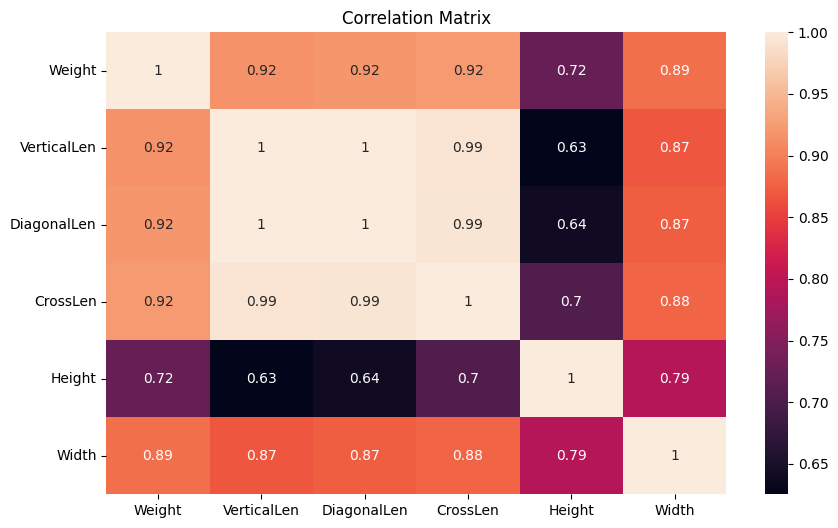

In [ ]:
# y como parte de un análisis, revisaremos la correlación de las variables
df2 = df1.drop("Species", axis=1)
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df2.corr(), annot =True)
plt.title('Correlation Matrix')

Al analizar la correlación, vemos que las variables CrossLen, VerticalLen y DiagonalLen están altamente correlacionadas (su valor de correlación es cercano al 1) por lo que, conservar estas variables puede causar problemas, es decir, el dataset no tendría variables linealmente independientes, lo que es un requisito para crear modelos de regresión.


In [ ]:
# eliminando variables no independientes
df3 = df1.drop(["DiagonalLen", "CrossLen"], axis=1)
df3.head()

,Species,Weight,VerticalLen,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


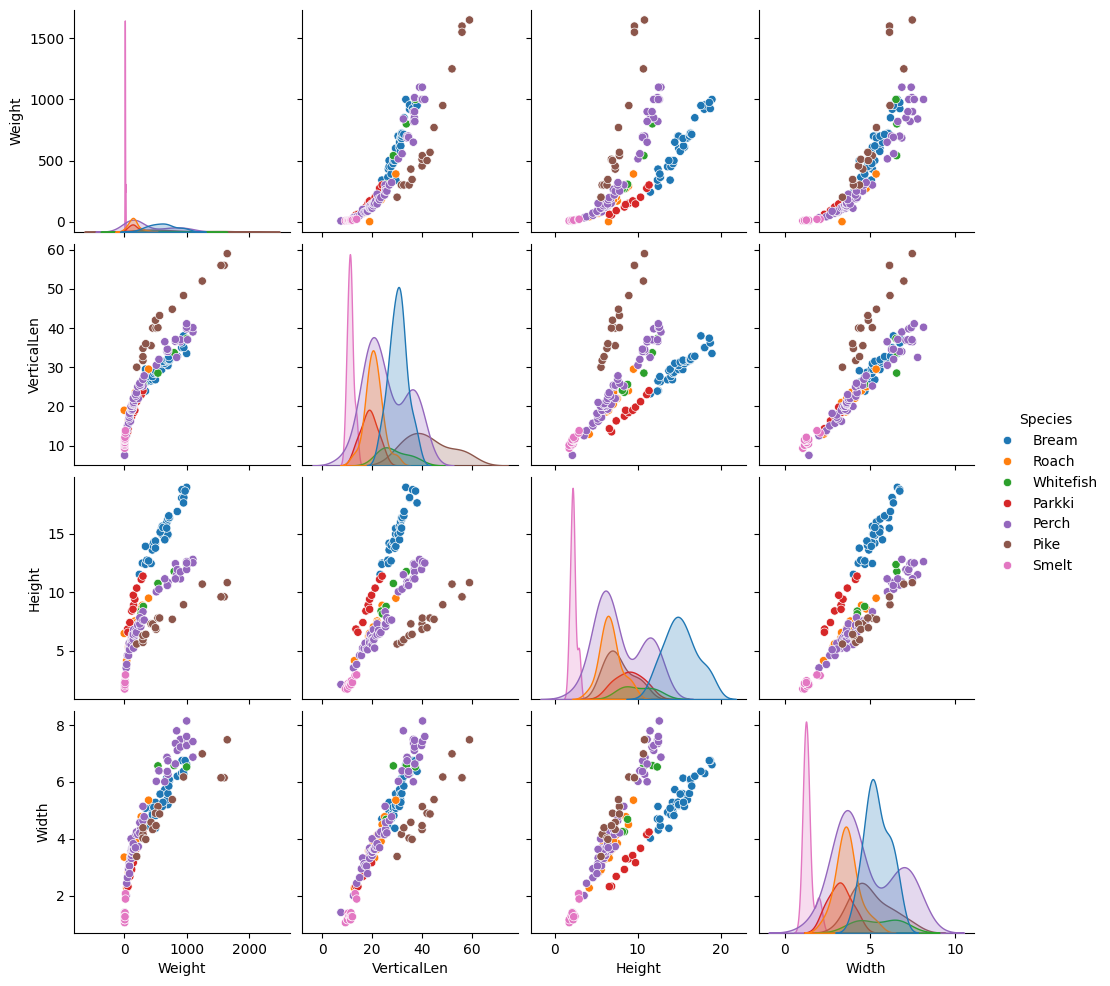

In [ ]:
# visualizando los datos
sns.pairplot(df3, kind= "scatter", hue="Species")
# en el pairplot se puede apreciar que hay ciertas correlaciones entre ancho y alto. Sin embargo, entre diferentes especies hay variaciones.

Los insights de la gráfica anterior:

- Roach...
- Smelt...

In [ ]:
# Preprocesando el conjunto de datos
df3.isna().sum() # revisando si hay nulos

Species        0
Weight         0
VerticalLen    0
Height         0
Width          0
dtype: int64

In [ ]:
# Eliminando casos imposibles con la lógica del dataset. Por ejemplo, peces con peso o longitudes que sean cero
df3[df3["Weight"] == 0]
# se debe mostrar una tabla con los eliminados, eliminamos empleando el index

,Species,Weight,VerticalLen,Height,Width
40,Roach,0.0,19.0,6.4752,3.3516


In [ ]:
df3.drop([40])

,Species,Weight,VerticalLen,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340
...,...,...,...,...,...
154,Smelt,12.2,11.5,2.0904,1.3936
155,Smelt,13.4,11.7,2.4300,1.2690
156,Smelt,12.2,12.1,2.2770,1.2558
157,Smelt,19.7,13.2,2.8728,2.0672


In [ ]:
# ya que las especies son un valor categórico, y necesitamos números para entrenar modelos, la mejor alternativa es realizar un "one-hot" encoding, que convierte los nombres de especies (7 especies) en un arreglo de 1x7 donde solo se verá un uno (True) en la columna que corresponda al nombre, en el otro caso se tendrán ceros (False).
especies_codificadas = pd.get_dummies(df3.Species)
especies_codificadas.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


In [ ]:
# luego creamos un dataframe que contenga toda la información
df4 = pd.concat([df3, especies_codificadas], axis="columns")
df4.head()
# como ya tenemos los nombres codificados, podemos deshacernos de la columna con los nombres y tambien la columna Whitefish
# que no nos sirve para el ejercicio, a Whitefish lo eliminamos porque solo hay 6 muestras, que son insuficientes para el ejercicio de entrenamiento de un modelo.
df5 = df4.drop(["Species", "Whitefish"], axis="columns")
df5.head()

,Weight,VerticalLen,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,23.2,11.5200,4.0200,True,False,False,False,False,False
1,290.0,24.0,12.4800,4.3056,True,False,False,False,False,False
2,340.0,23.9,12.3778,4.6961,True,False,False,False,False,False
3,363.0,26.3,12.7300,4.4555,True,False,False,False,False,False
4,430.0,26.5,12.4440,5.1340,True,False,False,False,False,False


### Creando un modelo de regresión
Para entrenar el modelo, se requieren datos de entrenamiento y datos de validación. También es necesario separar el dataframe en dos variables que sirvan como datos ($X$) y etiquetas ($y$)

In [ ]:
# X tendrá los datos de entrenamiento
X = df5[["Height", "Width", "VerticalLen", "Bream", "Parkki", "Pike", "Roach", "Smelt"]]
y = df5[["Weight"]]
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

Tamaño de X_train= (127, 8)
Tamaño de X_test= (32, 8)
Tamaño de y_train= (127, 1)
Tamaño de y_test= (32, 1)


### EJEMPLOS DE REGRESIÓN POLINÓMICA:

- **Regresión polinómica (no lineal):**

Como se tienen diferentes especies de peces, la relacion entre características como peso, ancho y alto no es lineal. Por lo tanto, una recta no va a modelar apropiadamente el comportamiento del peso de los peces en función de sus características.
 Crearemos una función para visualizar datos usando un polinomio con varios grados.

Las funciones que permiten trazar varios grados de un polinomio en función de los datos son `np.polyfit()` que funciona mediante mínimos cuadrados para resovler una ecuación polinómica. Esta función requiere suministrar datos (x,y) y el grado del polinomio a ajustar. Polyfit retornará los coeficientes que mejor se ajusten a los datos.



In [ ]:
def polynomial_plot(feature, label):
    # Crear un array de una dimensión para reducir el arreglo de dos dimensiones a una.
    x_coordinates = feature
    y_coordinates = np.squeeze(label)

    # polinomio de primer grado (recta)
    linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
    # polinomio de segundo grado (curva parabólica)
    quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))

    # Generar valores para visualizar los datos
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

    plt.scatter(x_coordinates,y_coordinates, color='blue')
    plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Modelo lineal')
    plt.plot(values, quadratic_func(values), color='red', label='Polinomio cuadrático')
    plt.xlabel('Datos de test de %s '%(feature.name))
    plt.ylabel('Peso del pez')
    plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
    plt.legend()
    plt.title("Comparacion de funciones lineales y cuadráticas para la característica %s" % (feature.name))
    plt.show()

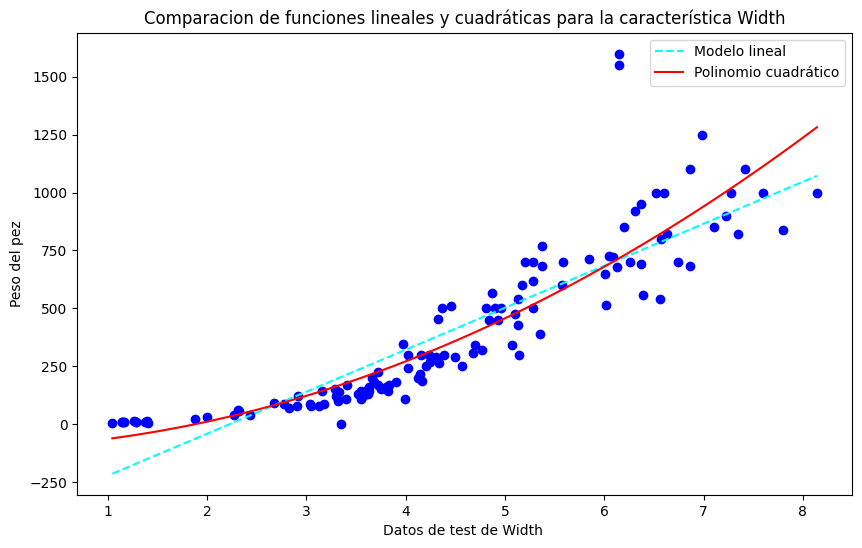

In [ ]:
polynomial_plot(X_train.Width, y_train) # comparando modelos para el ancho y el peso del pez

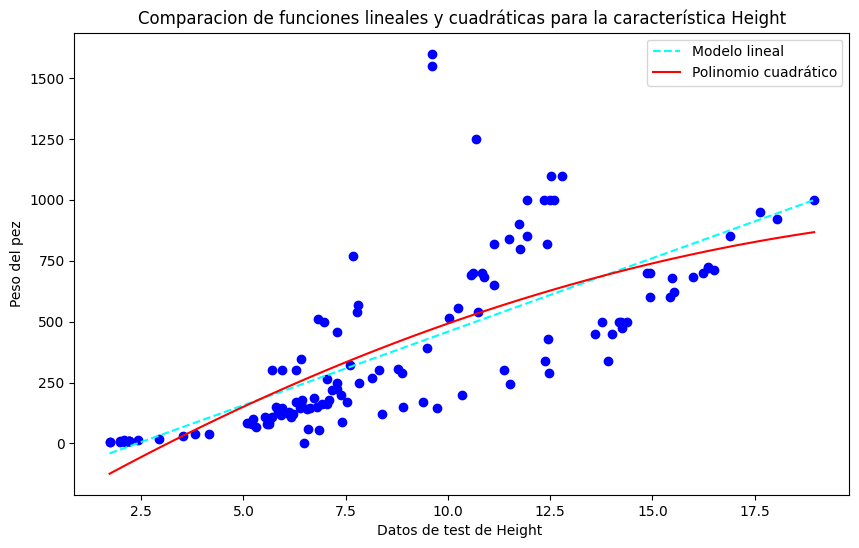

In [ ]:
polynomial_plot(X_train.Height, y_train) # comparando modelos para el alto y el peso del pez

De los gráficos vemos que hay un mejor ajuste del modelo cuadrático al modelo lineal. Como ejercicio, graficar polinomios de orden superior, para validar si existen mejores ajustes e incluso ver si se llega al sobre-entrenamiento.


### Regresión polinómica utilizando Sklearn
Emplearemos un polinomio de grado 2 para realizar la regresión.

In [ ]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)

lm = linear_model.LinearRegression()
lm.fit(X_poly, y_train)

predictions = lm.predict(poly.fit_transform(X_test))
print('r2_score= ', metrics.r2_score(y_test, predictions))


r2_score=  0.9796619513456701


### Entendiendo los resultados del entrenamiento.
Al terminar el entrenamiento, tenemos que el valor de la métrica de R cuadrado indica un buen ajuste.
Lo que podemos hacer es intentar predecir los datos de prueba y validar cómo le va al modelo en comparación con las etiquetas


In [ ]:
predictedWeight = pd.DataFrame(predictions, columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Weight,1650.000000,273.000000,135.000000,130.000000,363.00000,610.000000,9.800000,955.000000,575.000000,300.00000,...,390.000000,70.000000,150.000000,950.000000,120.000000,430.000000,51.500000,19.700000,925.000000,120.000000
Predicted Weight,1818.531982,289.648926,117.886475,141.088135,367.64624,635.217773,5.043945,948.123047,619.986084,297.22168,...,402.112793,50.454346,101.698242,984.097168,107.136719,367.826416,52.141846,17.682373,1054.284912,132.001953


En la tabla se aprecia que los datos estan cercanos y que no tenemos datos negativos ni ceros. Sin embargo, es mejor graficar y utilizar métricas para evaluar el modelo

Text(0.5, 1.0, 'Comparación del peso generado por el modelo y las etiquetas')

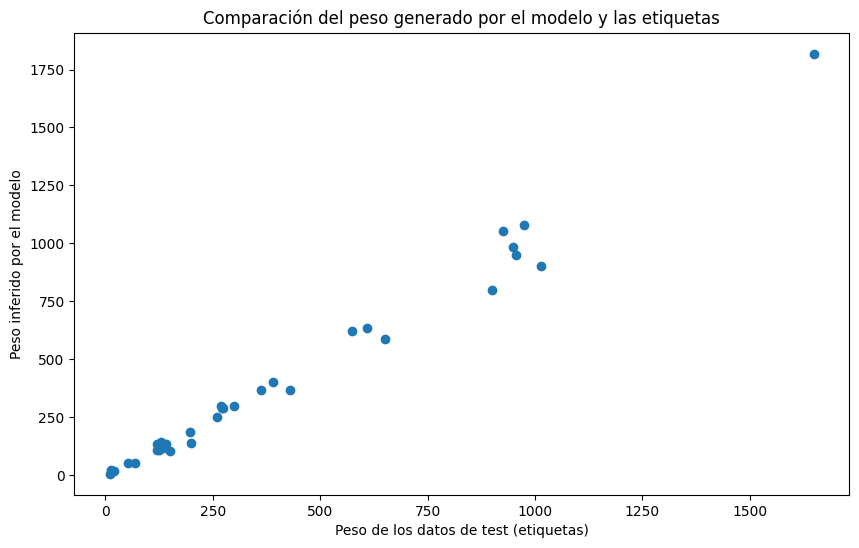

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Peso de los datos de test (etiquetas)')
plt.ylabel('Peso inferido por el modelo')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Comparación del peso generado por el modelo y las etiquetas")

Text(0.5, 1.0, 'histograma de las diferencias')

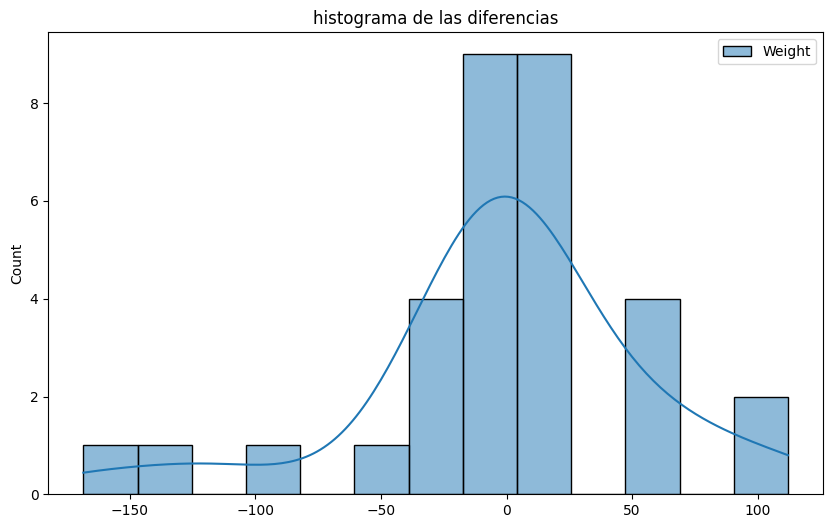

In [ ]:
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
sns.histplot(y_test-predictions, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

## Tarea(2) en clase/casa: ver al final en la tarea(3).


- NOTA:

```
residuals = y_test-predictions (diferencias)
```

Si la distribución de los residuals es aproximadamente gasussiana (idealmente de media-->0) implica que sí se está cumpliendo con una de las asumpciones de los modelos de regresión lineal.

*Profundizar más en:

- https://www.dailydoseofds.com/where-did-the-assumptions-of-linear-regression-originate-from/?utm_source=substack&utm_medium=email

- https://blog.dailydoseofds.com/p/statsmodel-regression-summary-will?utm_source=substack&utm_medium=email

In [ ]:
residuals = y_test-predictions
residuals

,Weight
144,-168.531982
70,-16.648926
89,17.113525
85,-11.088135
3,-4.646240
18,-25.217773
149,4.756055
31,6.876953
20,-44.986084
107,2.778320


## Metricas

In [13]:
def mean_squared_error(y_true, y_pred):
  n = len(y_true)
  mse = sum((float(yt) - float(yp)) ** 2 for yt, yp in zip(y_true, y_pred)) / n
  return mse

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    return rmse

def mean_absolute_error(y_true, y_pred):
    n = len(y_true)
    mae = sum(abs(yt - yp) for yt, yp in zip(y_true, y_pred)) / n
    return mae

def r2_score(y_true, y_pred):
    mean_y_true = sum(y_true) / len(y_true)
    ss_total = sum((yt - mean_y_true) ** 2 for yt in y_true)
    ss_res = sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred))
    r2 = 1 - (ss_res / ss_total)
    return r2

df2 = pd.DataFrame({
    'Weight': y_test['Weight'].values,
    'Predictions': predictions.flatten()
})
df2.head()

mse = mean_squared_error(list(df2['Weight'].values), list(predictions.flatten()))
rmse = root_mean_squared_error(list(df2['Weight'].values), list(predictions.flatten()))
mae = mean_absolute_error(list(df2['Weight'].values), list(predictions.flatten()))
r2 = r2_score(list(df2['Weight'].values), list(predictions.flatten()))

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


KeyError: 'Weight'

### Conclusiones del modelo de regresión

Se puede tener un modelo que tiene una precisión sobre el 90% para calcular el peso de un pez dadas sus medidas (alto, ancho,  longitud). El modelo predice apropiadamente el peso, teniendo en cuenta que son siete especies de peces para los que evaluamos el rendimiento del modelo.
El enfoque de usar un modelo de polinómio de segundo grado funciona para este ejemplo

## Tarea(3) en clase/casa:

De acuerdo a lo anterior, aplicar al mismo dataset (escogido por usted) los 4 métodos de regresión vistos hasta el momento (lineal simple, lineal múltiple, logarítmica, y polinomial). Para la tarea(2): obtener la misma gráfica de la distribución de los "residuals" para cada uno de los 4 modelos.

# 1. Trabajop sobre datos de Parkinson importado Kaggle

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

**Data Set Information:**
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

**Attribute Information:**

Matrix column entries (attributes):

**name** - ASCII subject name and recording number

**MDVP:Fo(Hz)** - Average vocal fundamental frequency

**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency

**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency

**MDVP:Jitter(%) , MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ , Jitter:DDP** - Several measures of variation in fundamental frequency

**MDVP:Shimmer , MDVP:Shimmer(dB) , Shimmer:APQ3 , Shimmer:APQ5 , MDVP:APQ , Shimmer:DDA** - Several measures of variation in amplitude

**NHR , HNR** - Two measures of ratio of noise to tonal components in the voice

**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy

**RPDE , D2** - Two nonlinear dynamical complexity measures

**DFA** - Signal fractal scaling exponent

**spread1 , spread2 , PPE** - Three nonlinear measures of fundamental frequency variation

In [4]:
df= pd.read_csv('/content/parkinsons data.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# 2 Descripción general

In [5]:
df.describe()
#describe(include='all') inluir las variables categoricas

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# 3. Matriz de correlación

In [6]:
# Calcular la matriz de correlación
correlation_matrix = df[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','status','RPDE','DFA']].corr()

# Mostrar la matriz de correlación
print("\nMatriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
                  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.1

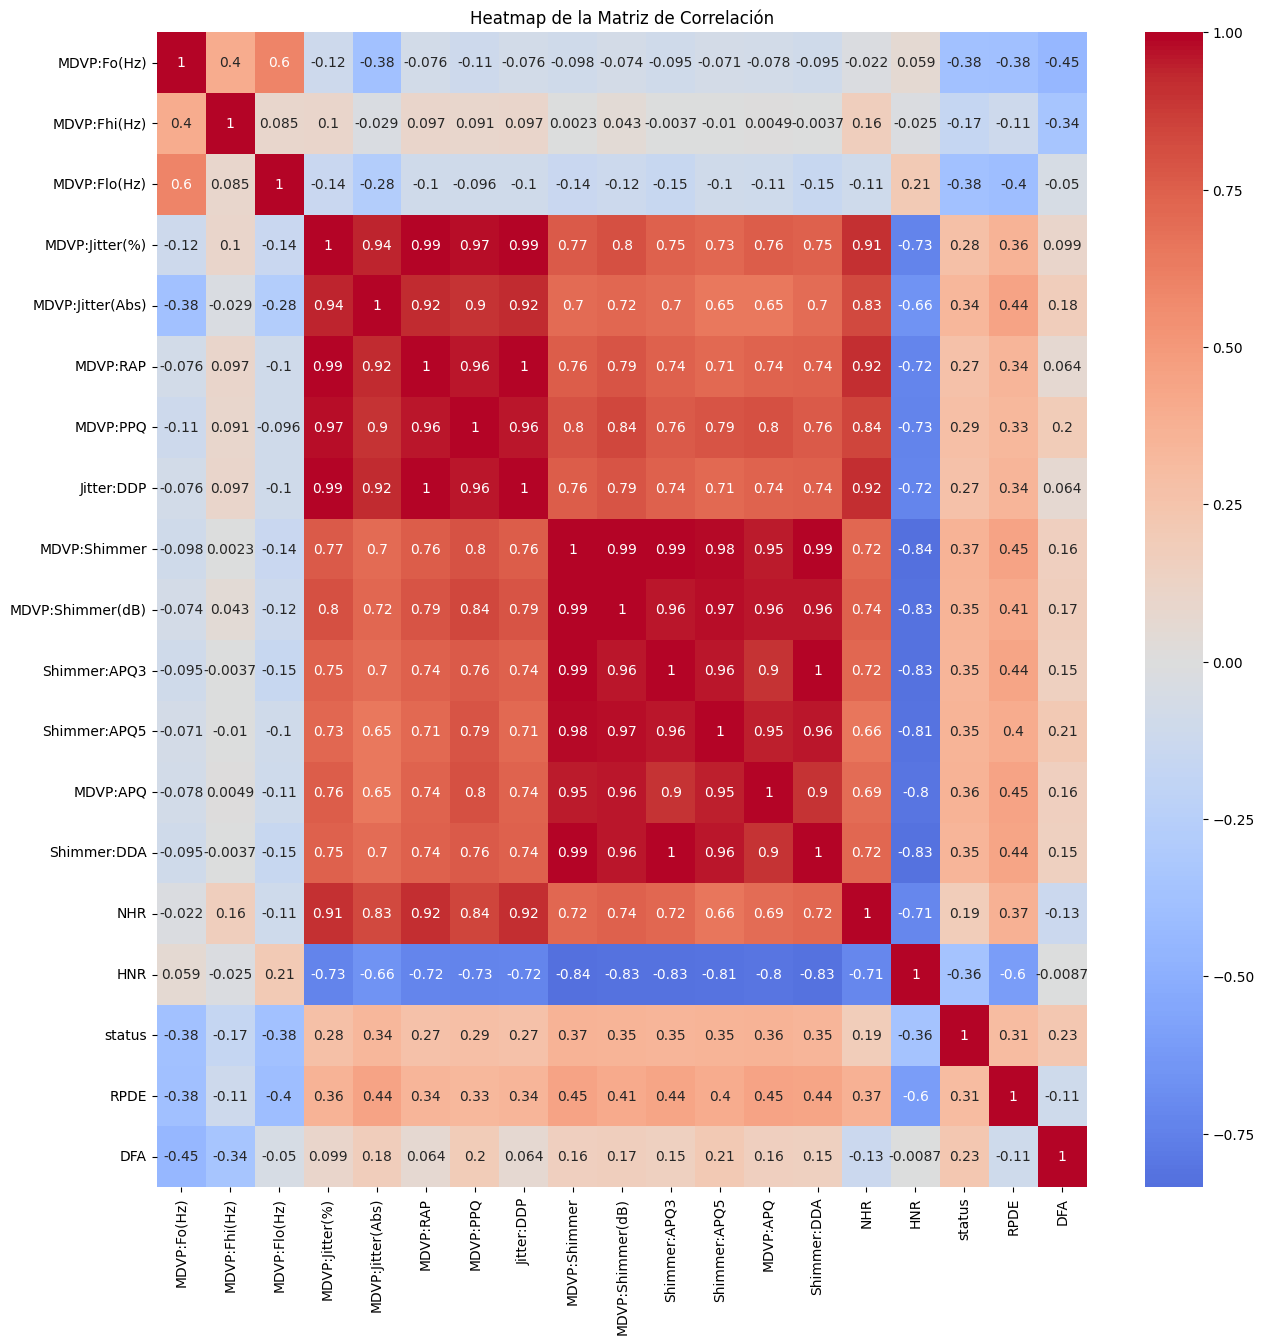

In [7]:
# Crear el mapa de calor
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Configurar el título del gráfico
plt.title('Heatmap de la Matriz de Correlación')

# Mostrar el gráfico
plt.show()

### Teniendo en cuenta los resultados de la matriz de correlación voy a usar para el modelo de regresión lineal simple las variables **Shimmer:APQ5** como variable independiente y **MDVP:Shimmer** como dependiente
## Regresión lineal simple

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['Shimmer:APQ5']]  # Variable independiente
y = df['MDVP:Shimmer']  # Variable dependiente

# División en 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
predictions_rs=model.predict(X_test)
predictions_rs

array([0.05623884, 0.02049928, 0.02976396, 0.03313851, 0.03924337,
       0.02355172, 0.03264766, 0.01571356, 0.02484018, 0.01832116,
       0.0196403 , 0.05688307, 0.02388917, 0.02855218, 0.0259139 ,
       0.01698668, 0.04034777, 0.01769227, 0.02303019, 0.01177147,
       0.02632805, 0.02599059, 0.02985599, 0.01557551, 0.02634339,
       0.01485458, 0.02907371, 0.0602883 , 0.01252307, 0.05841695,
       0.01350476, 0.02079072, 0.01663389, 0.01666456, 0.03060759,
       0.02036123, 0.03850711, 0.02160368, 0.02318358])

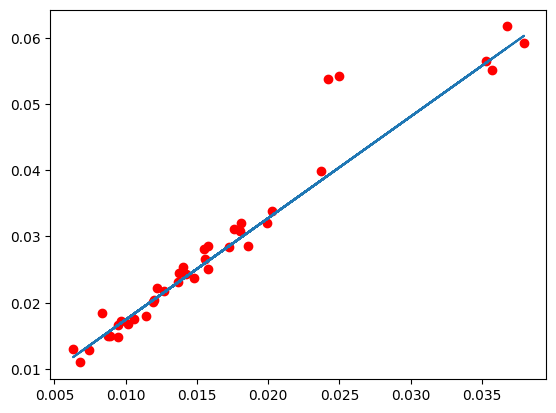

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, c='r')
plt.plot(X_test, predictions_rs)

In [14]:
mse = mean_squared_error(y_test, predictions_rs)
rmse = root_mean_squared_error(y_test, predictions_rs)
mae = mean_absolute_error(y_test, predictions_rs)
r2 = r2_score(y_test, predictions_rs)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


MSE: 1.241863706301418e-05
RMSE: 0.0035240086638676387
MAE: 0.0018292501179090208
R2: 0.9349995774525546


Text(0.5, 1.0, 'histograma de las diferencias')

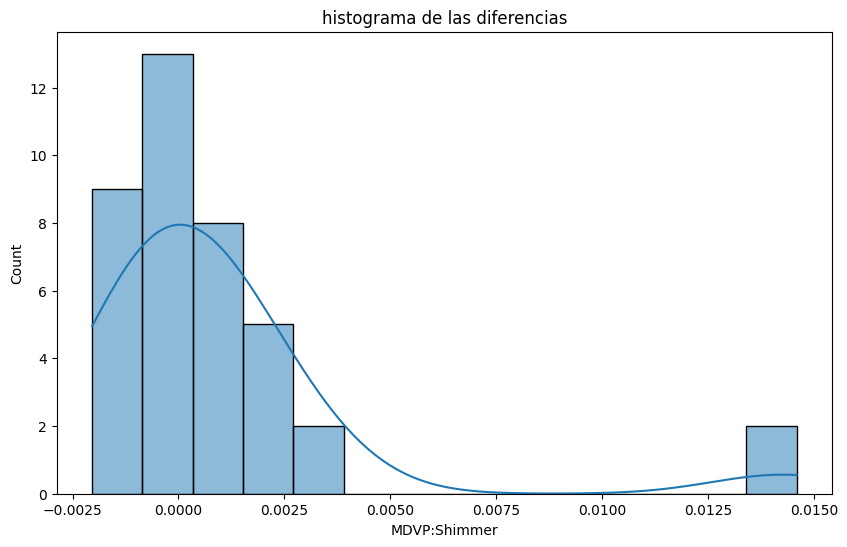

In [15]:
sns.histplot(y_test-predictions_rs, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

## Al haber elegido un par de varibles con alta correlación podemos verlo reflejado en las métricas del modelo con una alta precisión en las predicciones.

## Regresión lineal múltiple
### Se usan variables no correlacionadas con el fin de evitar errores en la predicción

In [16]:
X = df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'NHR', 'HNR']]
y = df['MDVP:Shimmer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
predictions_rsm = model.predict(X_test)
predictions_rsm

array([0.04433207, 0.02677756, 0.02940672, 0.02701739, 0.0357901 ,
       0.03386568, 0.03300847, 0.0177835 , 0.03154249, 0.0280793 ,
       0.02863624, 0.04204749, 0.0337214 , 0.0297178 , 0.0423919 ,
       0.01584495, 0.02873088, 0.02355925, 0.04901927, 0.01683455,
       0.03542564, 0.03192567, 0.03482358, 0.02008004, 0.03315059,
       0.02699394, 0.03430121, 0.02958659, 0.01525967, 0.06040034,
       0.0164237 , 0.01958215, 0.02168248, 0.01550149, 0.037282  ,
       0.03181216, 0.04572358, 0.03333233, 0.02189414])

In [17]:
mse = mean_squared_error(y_test, predictions_rsm)
rmse = root_mean_squared_error(y_test, predictions_rsm)
mae = mean_absolute_error(y_test, predictions_rsm)
r2 = r2_score(y_test, predictions_rsm)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.00011247628096537218
RMSE: 0.010605483532841497
MAE: 0.008077505244686426
R2: 0.41128758717907943


### Las variables seleccionadas para el ejemplo evidencian que el modelo no es muy bueno con las predicciones

Text(0.5, 1.0, 'histograma de las diferencias')

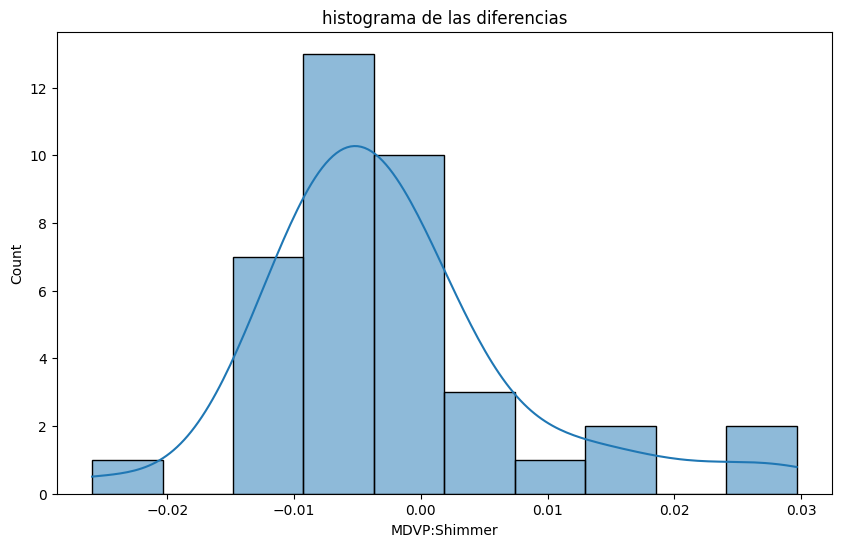

In [18]:
sns.histplot(y_test-predictions_rsm, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

## Regresión polinómica

In [19]:
sns.pairplot(df, kind= "scatter", hue="MDVP:Fo(Hz)")

Output hidden; open in https://colab.research.google.com to view.

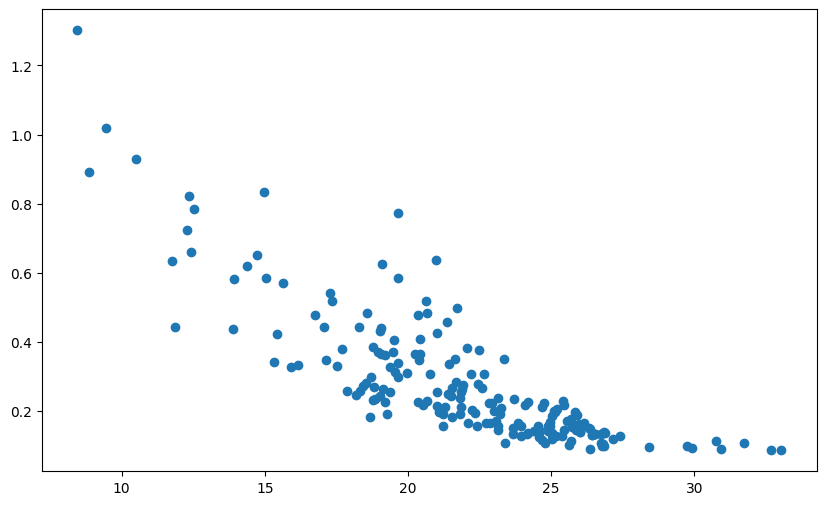

In [20]:
plt.scatter(df['HNR'],df['MDVP:Shimmer(dB)'] )

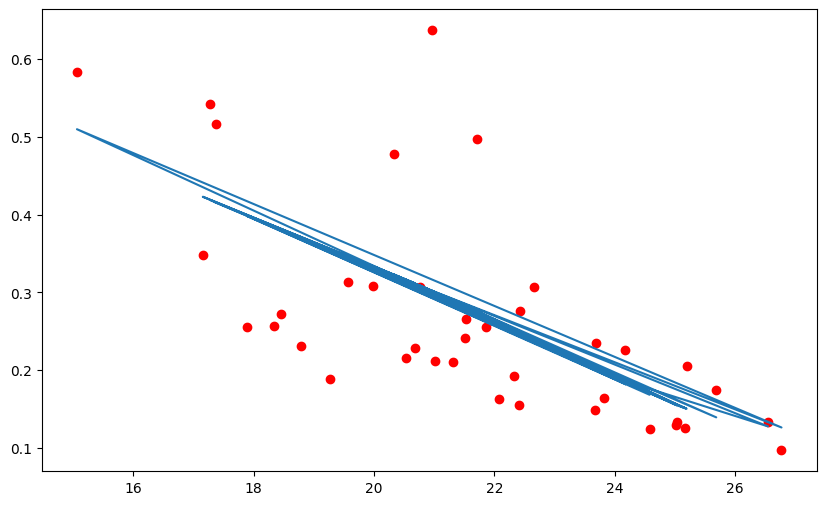

In [25]:
# creando un objeto para la regresión polinómica
X = df[['HNR']]
y = df['MDVP:Shimmer(dB)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=10)
poly_features = poly_regressor.fit_transform(X_train)
poly_features_test=poly_regressor.fit_transform(X_test)
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_train)

y_pred = model.predict(poly_features_test)

plt.scatter(X_test, y_test, c='r')
plt.plot(X_test, y_pred)

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.01016175728295458
RMSE: 0.10080554192580178
MAE: 0.07717992799936817
R2: 0.4319441908634829


Text(0.5, 1.0, 'histograma de las diferencias')

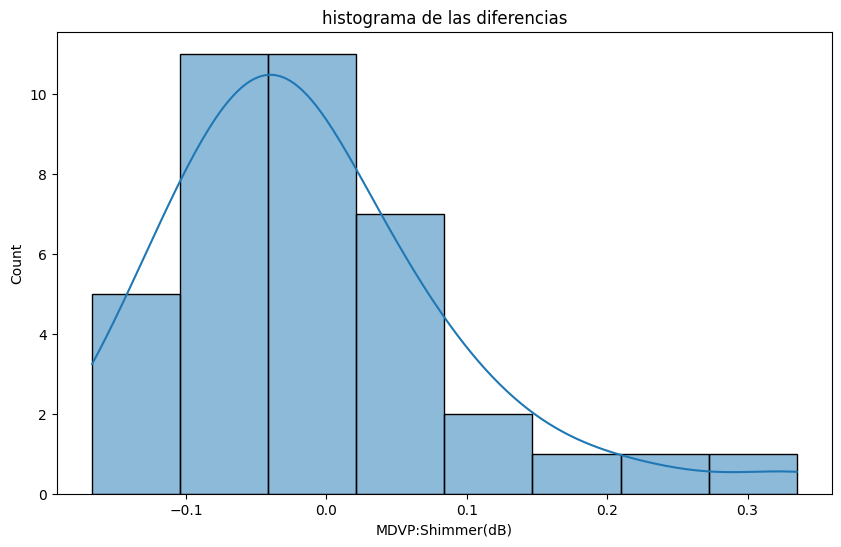

In [27]:
sns.histplot(y_test-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

### Como conclusión del ejemplo se evidencia que el modelo no hace predicciones correctas. Por lo tanto, no es un buen modelo

# Regresión logarítmica

In [34]:
X = np.log(df[['Shimmer:APQ5']]) # Variable independiente
y = np.log(df['MDVP:Shimmer'] ) # Variable dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modelo de regresión logarítmica
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
predictions_log = model.predict(X_test)
predictions_log

array([-2.86642245, -3.89742454, -3.50786645, -3.39791342, -3.22637738,
       -3.75081059, -3.41314143, -4.18514168, -3.69509381, -4.01776607,
       -3.9430903 , -2.85512056, -3.73590119, -3.55065481, -3.65102302,
       -4.0997599 , -3.19838568, -4.05553198, -3.77431993, -4.51161616,
       -3.63455309, -3.64795154, -3.50469366, -4.19487559, -3.63394851,
       -4.24738471, -3.53200424, -2.79750624, -4.44015445, -2.8287374 ,
       -4.35420556, -3.88241372, -4.12266601, -4.12065223, -3.47916948,
       -3.90461808, -3.2455047 , -3.84174642, -3.76734517])

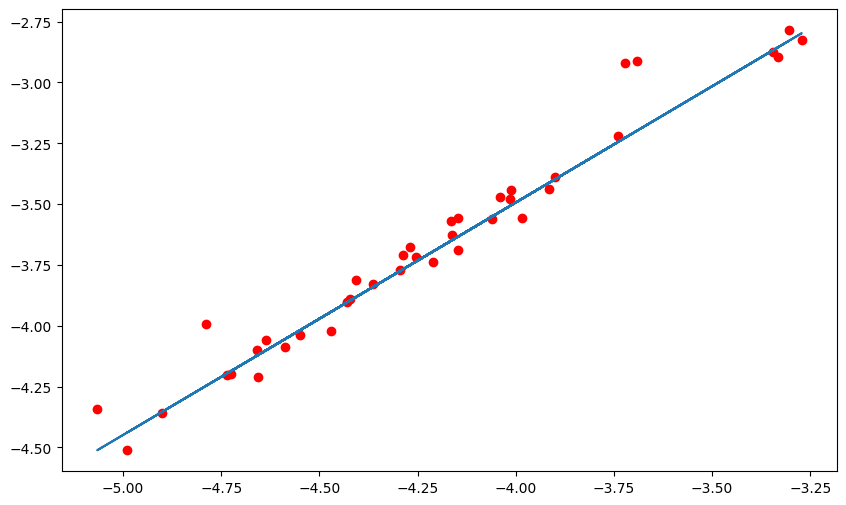

In [35]:
plt.scatter(X_test, y_test, c='r')
plt.plot(X_test, predictions_log)

In [36]:
mse = mean_squared_error(y_test, predictions_log)
rmse = root_mean_squared_error(y_test, predictions_log)
mae = mean_absolute_error(y_test, predictions_log)
r2 = r2_score(y_test, predictions_log)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.008777958493812889
RMSE: 0.09369075991693572
MAE: 0.06017260380478998
R2: 0.9566605192128947


Text(0.5, 1.0, 'histograma de las diferencias')

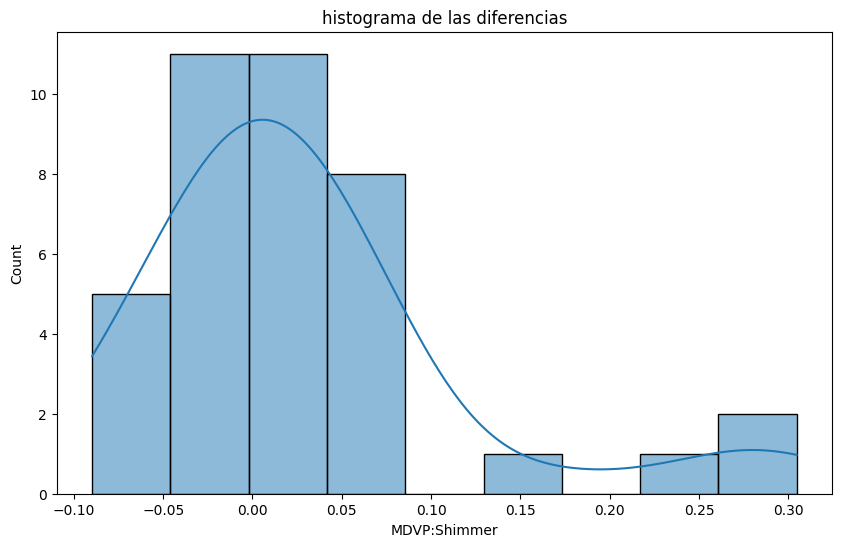

In [37]:
sns.histplot(y_test-predictions_log
, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

### Se aplico la regresión logarítmica a las mismas variables de la regresión lineal y se evidencia un comportamiento similar en las métricas del modelo; sin embargo, es un poco menos preciso